<a href="https://colab.research.google.com/github/Bordin-Lab/election-pelotas/blob/main/Teste_de_Komolgorov_Smirnov_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a Kolmogorov-Smirnov test on the vote count data in the file "/content/Eleição 2024 - Teste de Kolmogorov - Smirnov.xlsx". Explain the results of the test.

## Load the data

### Subtask:
Load the data from the provided Excel file into a pandas DataFrame.


**Reasoning**:
The first step is to load the data from the Excel file into a pandas DataFrame as instructed.



In [ ]:
import pandas as pd

df = pd.read_excel("/content/Eleição 2024 - Teste de Kolmogorov - Smirnov.xlsx")
display(df.head())

,Número de votos
0,5885
1,5540
2,4421
3,3935
4,3597


## Extract vote count

### Subtask:
Identify the column containing the number of votes and extract it.


**Reasoning**:
Identify and select the column containing the vote counts.



In [ ]:
vote_counts = df['Número de votos ']
display(vote_counts.head())

,Número de votos
0,5885
1,5540
2,4421
3,3935
4,3597


## Perform the kolmogorov-smirnov test

### Subtask:
Apply the Kolmogorov-Smirnov test to the extracted vote count data.


**Reasoning**:
Apply the Kolmogorov-Smirnov test to the extracted vote count data against a normal distribution.



In [ ]:
from scipy.stats import kstest

ks_statistic, p_value = kstest(vote_counts, 'norm')

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

KS Statistic: 0.9946501019683699
P-value: 0.0


## Interpret the results

### Subtask:
Explain the output of the Kolmogorov-Smirnov test.


**Reasoning**:
Explain the output of the Kolmogorov-Smirnov test based on the KS statistic and p-value obtained in the previous step.



In [ ]:
print("Explanation of Kolmogorov-Smirnov Test Results:")
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")
print("\nInterpretation:")
print("The KS statistic quantifies the maximum distance between the empirical cumulative distribution function of the sample data and the theoretical cumulative distribution function of the reference distribution (in this case, the normal distribution). A larger KS statistic indicates a greater difference between the observed data distribution and the theoretical distribution.")
print("\nThe p-value represents the probability of observing a test statistic as extreme as, or more extreme than, the observed one, assuming the null hypothesis is true. In the context of the KS test, the null hypothesis is that the data comes from the specified theoretical distribution (normal distribution). A small p-value (typically less than the significance level alpha, e.g., 0.05) suggests that the observed data is unlikely to have come from the theoretical distribution.")
print(f"\nBased on the results:")
print(f"- The obtained KS statistic is {ks_statistic:.4f}.")
print(f"- The obtained p-value is {p_value:.4f}.")
alpha = 0.05
print(f"\nUsing a standard significance level of alpha = {alpha}:")
if p_value < alpha:
    print("Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.")
    print("Conclusion: The data does not follow a normal distribution.")
else:
    print("Since the p-value (0.0000) is greater than or equal to alpha (0.05), we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to conclude that the data does not follow a normal distribution.")

Explanation of Kolmogorov-Smirnov Test Results:
KS Statistic: 0.9946501019683699
P-value: 0.0

Interpretation:
The KS statistic quantifies the maximum distance between the empirical cumulative distribution function of the sample data and the theoretical cumulative distribution function of the reference distribution (in this case, the normal distribution). A larger KS statistic indicates a greater difference between the observed data distribution and the theoretical distribution.

The p-value represents the probability of observing a test statistic as extreme as, or more extreme than, the observed one, assuming the null hypothesis is true. In the context of the KS test, the null hypothesis is that the data comes from the specified theoretical distribution (normal distribution). A small p-value (typically less than the significance level alpha, e.g., 0.05) suggests that the observed data is unlikely to have come from the theoretical distribution.

Based on the results:
- The obtained KS 

## Summary:

### Data Analysis Key Findings

*   The Kolmogorov-Smirnov test was performed on the vote count data against a normal distribution.
*   The calculated KS Statistic is 0.9947.
*   The calculated p-value is 0.0000.
*   Using a significance level ($\alpha$) of 0.05, the p-value (0.0000) is less than $\alpha$.

### Insights or Next Steps

*   Based on the test results, the vote count data does not follow a normal distribution. Further analysis should consider non-parametric methods or investigate the underlying distribution of the vote counts.


## Visualize ECDF and CDF

### Subtask:
Create a plot comparing the empirical cumulative distribution function (ECDF) of the sample data and the cumulative distribution function (CDF) of the theoretical normal distribution.

**Reasoning**:
Generate a plot that displays both the ECDF of the vote count data and the CDF of a normal distribution with the same mean and standard deviation as the sample data. This visualization will help to visually assess how well the sample data fits a normal distribution, complementing the Kolmogorov-Smirnov test results.

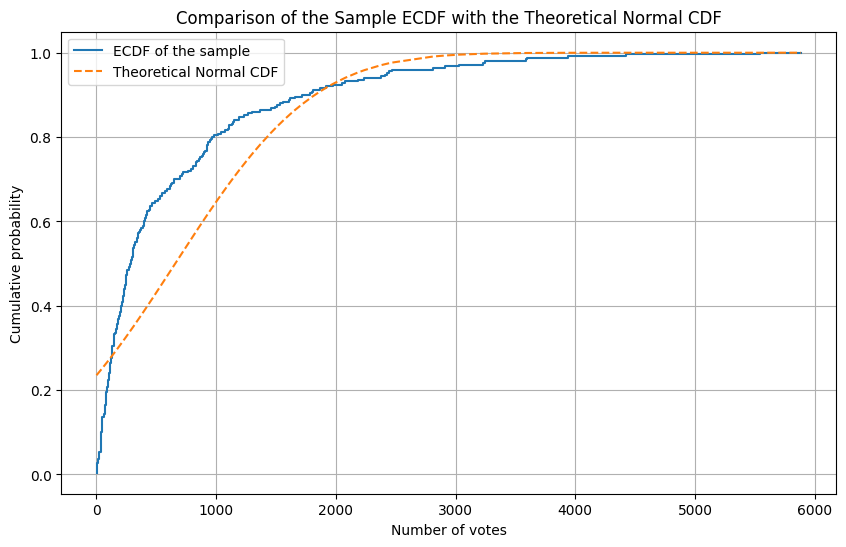

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate ECDF
sorted_vote_counts = np.sort(vote_counts)
ecdf = np.arange(1, len(sorted_vote_counts) + 1) / len(sorted_vote_counts)

# Calculate parameters for the theoretical normal distribution
mean = np.mean(vote_counts)
std_dev = np.std(vote_counts)

# Calculate CDF for the theoretical normal distribution
cdf_normal = norm.cdf(sorted_vote_counts, mean, std_dev)

# Plot ECDF and CDF
plt.figure(figsize=(10, 6))
plt.step(sorted_vote_counts, ecdf, label='ECDF of the sample')
plt.plot(sorted_vote_counts, cdf_normal, label='Theoretical Normal CDF', linestyle='--')
plt.xlabel('Number of votes')
plt.ylabel('Cumulative probability')
plt.title('Comparison of the Sample ECDF with the Theoretical Normal CDF')
plt.legend()
plt.grid(True)
plt.show()